In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ir_df = pd.read_csv("Spark_iris.csv")
ir_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ir_df.shape

(150, 6)

In [4]:
ir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
ir_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
ir_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
ir_df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
ir_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
ir_df.rename(columns={'SepalLengthCm':'sepal length (cm)','SepalWidthCm':'sepal width (cm)',
                   'PetalLengthCm':'petal length (cm)','PetalWidthCm':'petal width (cm)'}, inplace = True)

In [11]:
ir_df.head()

,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


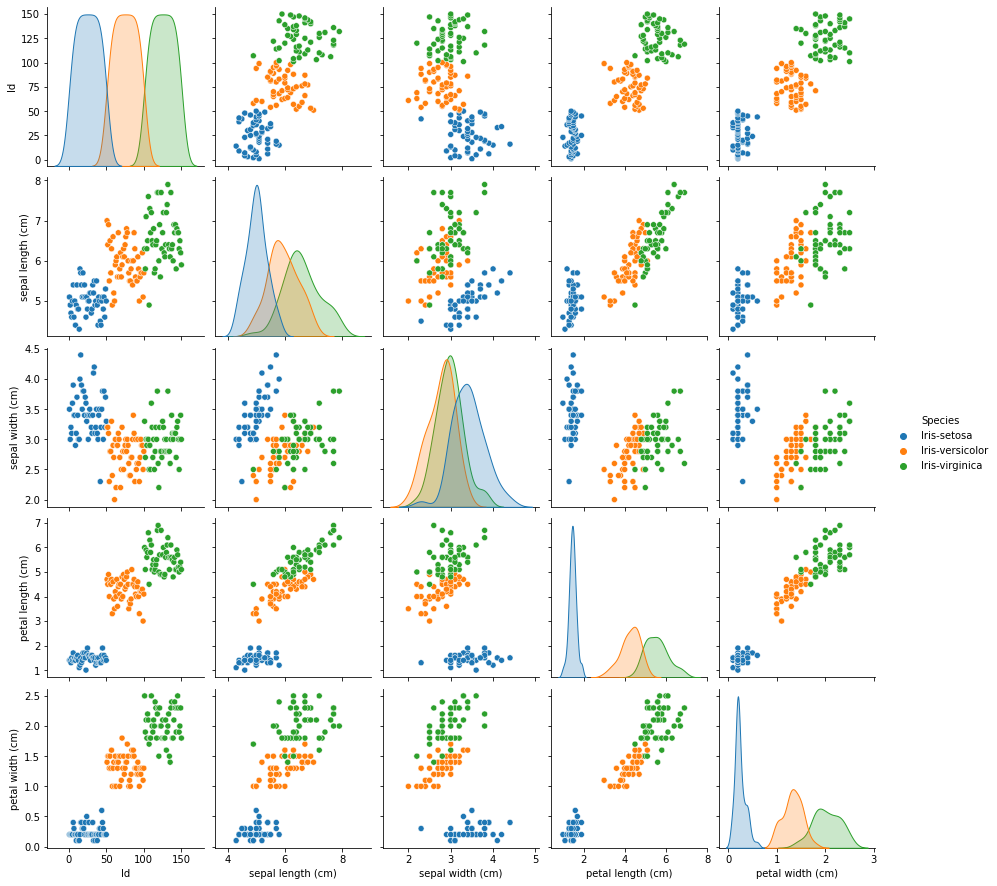

In [12]:
sns.pairplot(data=ir_df, hue="Species")
plt.show()

In [13]:
ir_df.corr()

,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal length (cm),0.716676,1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.882747,0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.899759,0.817954,-0.356544,0.962757,1.000000


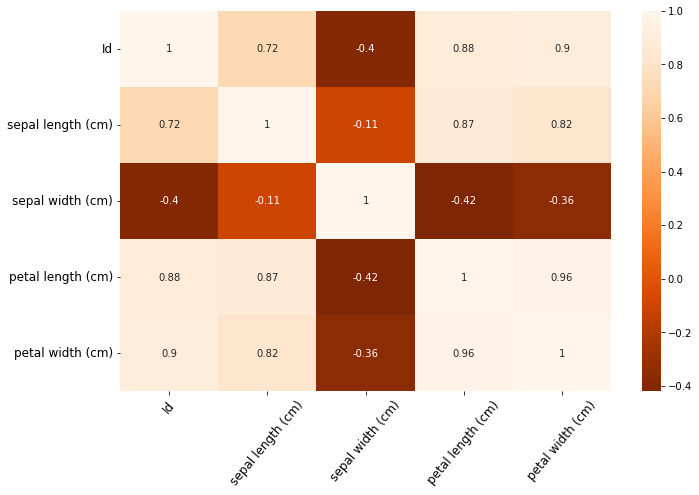

In [14]:
plt.figure(figsize=(11,7))
sns.heatmap(data=ir_df.corr(),annot=True, cmap="Oranges_r")
plt.xticks(fontsize = 12, rotation = 50 )
plt.yticks(fontsize = 12,  )
plt.show()


In [15]:
X = ir_df.drop(['Species',"Id"],axis=1)
Y = ir_df['Species']

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=19)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(120, 4)
(30, 4)
(120,)
(120,)


In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier() # dtree is instance of  DecisionTreeClassifier

dtree.fit(X_train,y_train)       # fitting training data
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
accuracy:-  100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



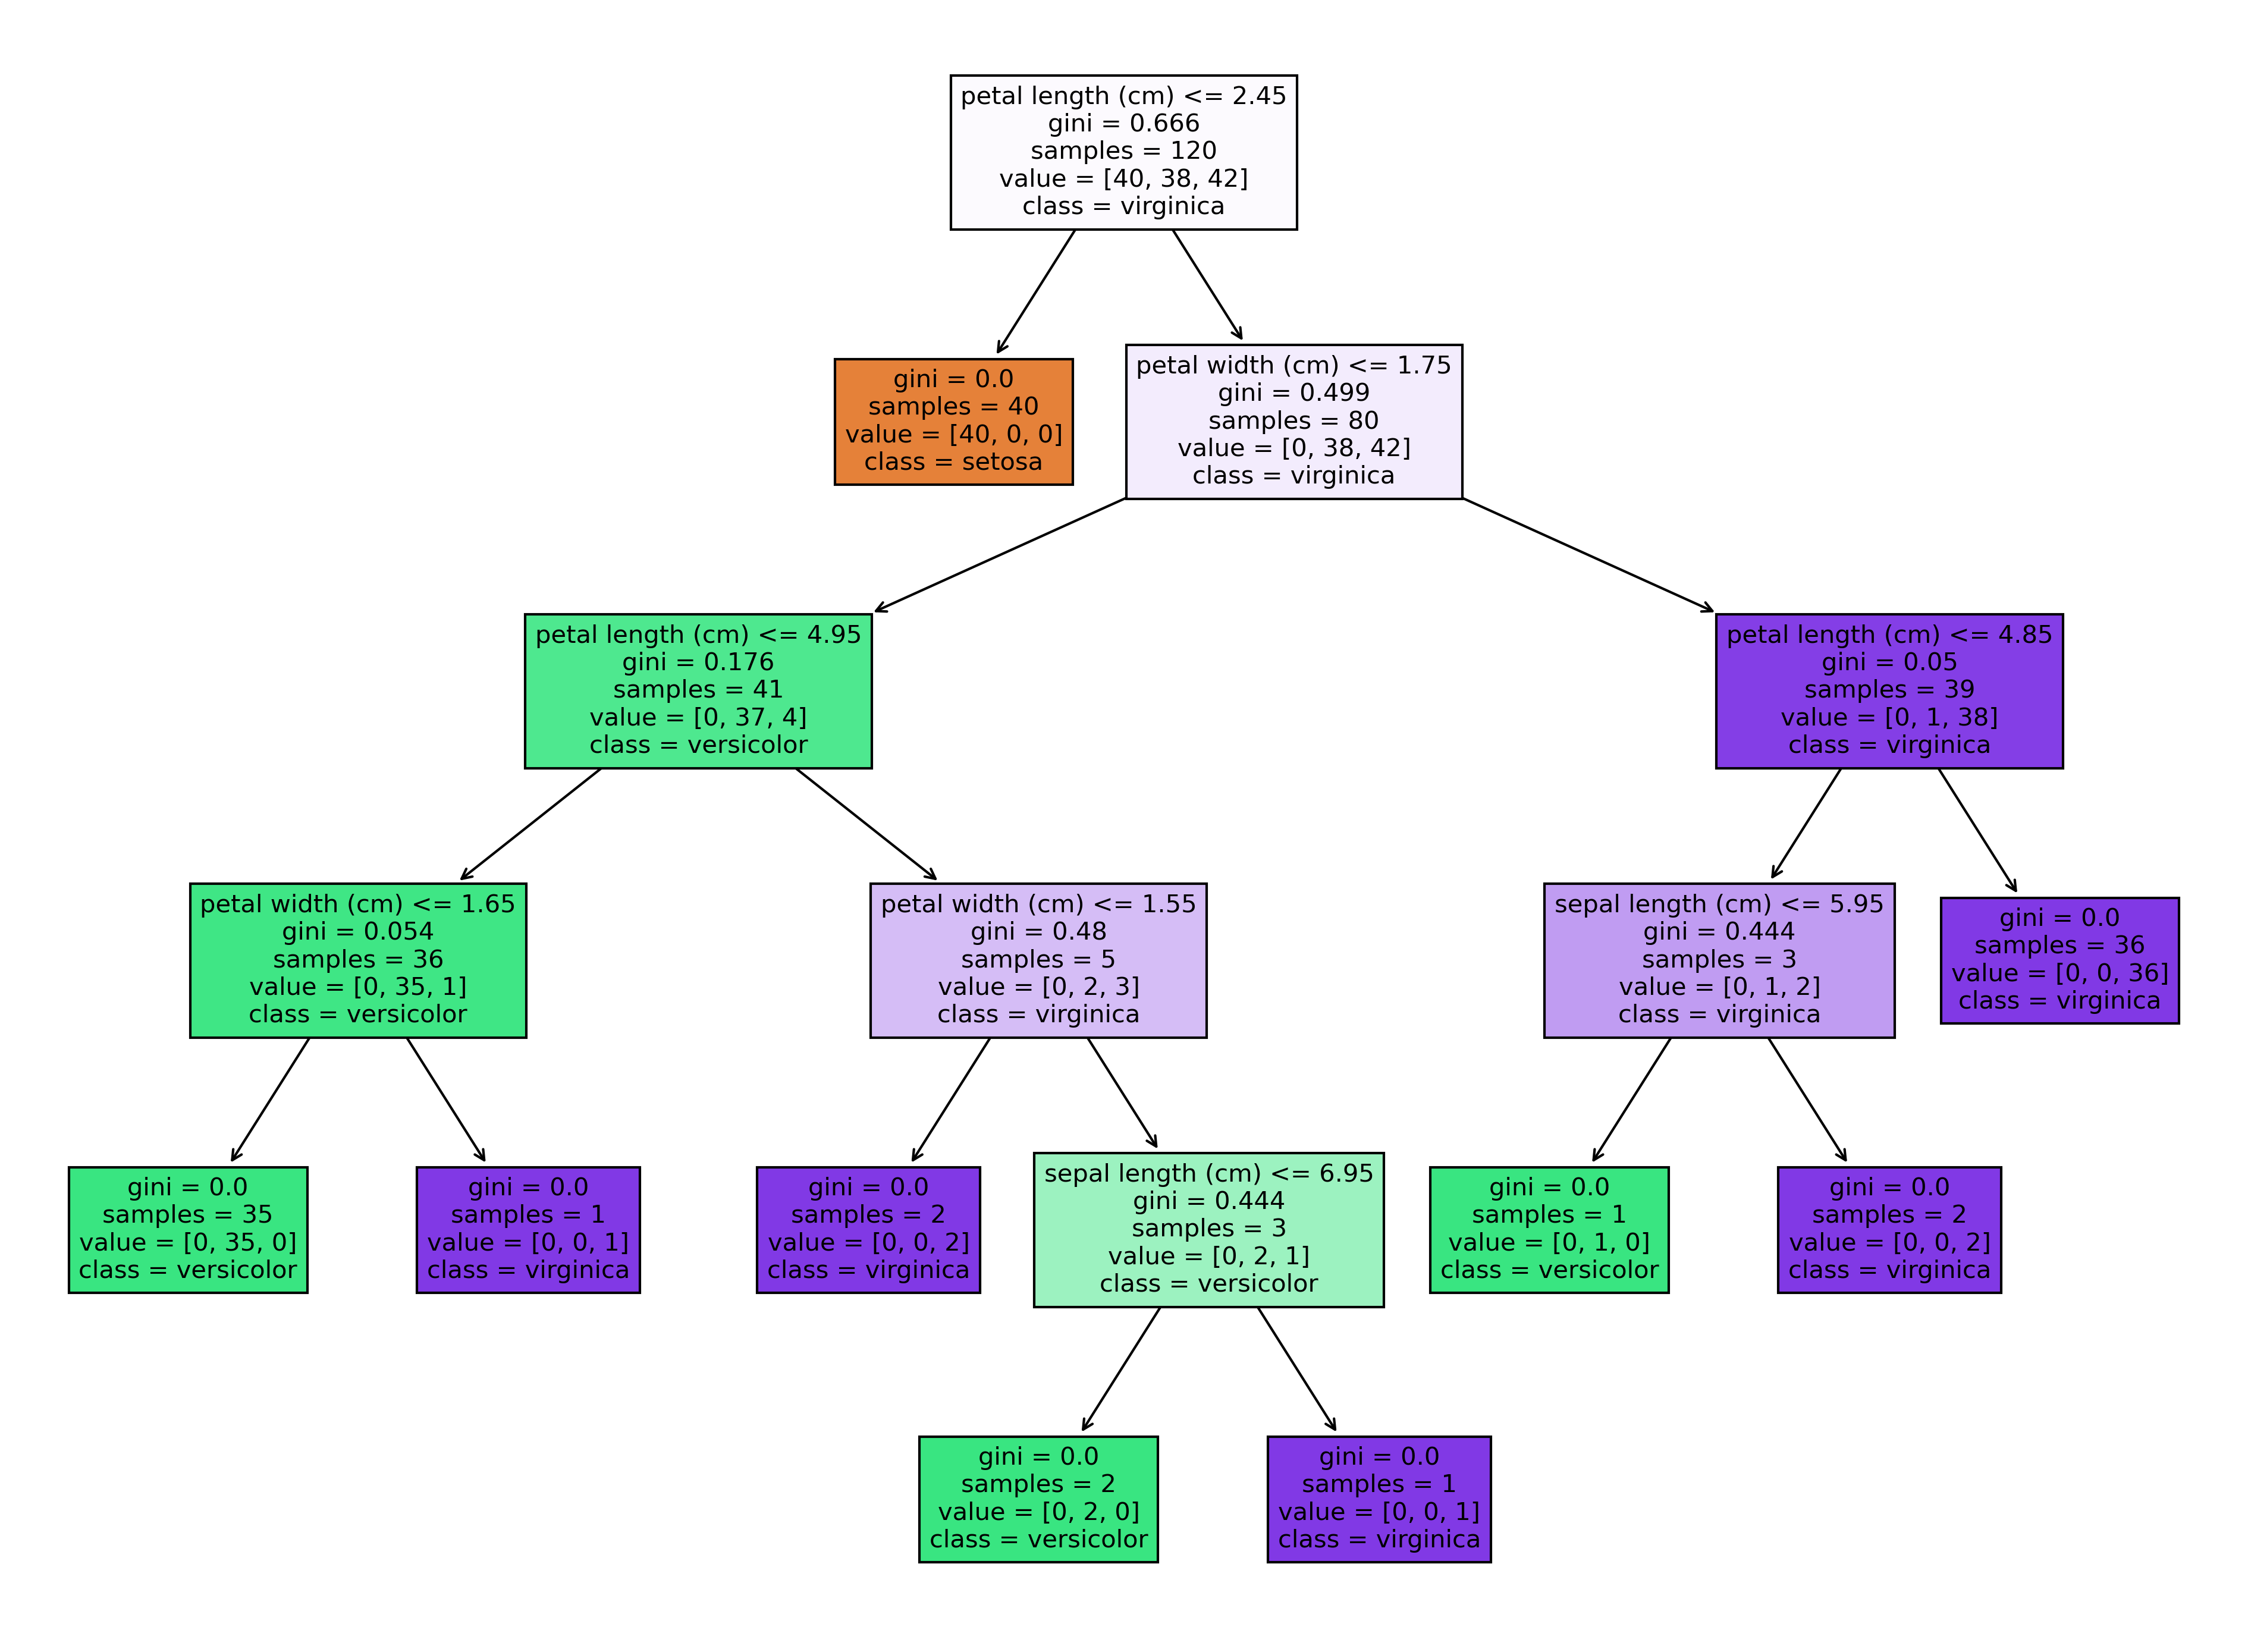

<Figure size 432x288 with 0 Axes>

In [21]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,12), dpi=300)
tree.plot_tree(dtree,feature_names = fn, class_names=cn,fontsize=10,filled = True);
plt.show()
plt.tight_layout()